In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


In [2]:
df = pd.read_csv('../Output/train_step1.csv')

In [3]:
df.shape

(478138, 27)

In [4]:
a = df['context_timestamp'][0]
a

'2018-09-18 10:09:04'

In [5]:
b = time.strptime(a, "%Y-%m-%d %H:%M:%S")
b

time.struct_time(tm_year=2018, tm_mon=9, tm_mday=18, tm_hour=10, tm_min=9, tm_sec=4, tm_wday=1, tm_yday=261, tm_isdst=-1)

In [6]:
b.tm_mday

18

In [7]:
b = []
for i in df['context_timestamp'] :
    b.append(time.strptime(i, "%Y-%m-%d %H:%M:%S").tm_mday)

In [8]:
Counter(b)

Counter({18: 78268,
         19: 70931,
         20: 68387,
         21: 71199,
         22: 68318,
         23: 63614,
         24: 57421})

In [9]:
for col in df.columns:
    print (col + ' 有' +str(pd.unique(df[col]).shape[0]) + '个特异值')

instance_id 有478087个特异值
item_id 有10075个特异值
item_category_list 有14个特异值
item_property_list 有10908个特异值
item_brand_id 有2055个特异值
item_city_id 有128个特异值
item_price_level 有14个特异值
item_sales_level 有18个特异值
item_collected_level 有18个特异值
item_pv_level 有22个特异值
user_id 有197694个特异值
user_gender_id 有4个特异值
user_age_level 有9个特异值
user_occupation_id 有5个特异值
user_star_level 有12个特异值
context_id 有478111个特异值
context_timestamp 有281824个特异值
context_page_id 有20个特异值
predict_category_property 有78796个特异值
shop_id 有3959个特异值
shop_review_num_level 有25个特异值
shop_review_positive_rate 有11825个特异值
shop_star_level 有22个特异值
shop_score_service 有16361个特异值
shop_score_delivery 有16423个特异值
shop_score_description 有16463个特异值
is_trade 有2个特异值


In [10]:
Counter(df.user_gender_id)

Counter({-1: 12902, 0: 360817, 1: 94070, 2: 10349})

## 缺失值的处理

In [11]:
df[:2].T

,0,1
instance_id,108641074714126964,5754713551599725161
item_id,3412720377098676069,3412720377098676069
item_category_list,7908382889764677758;5799347067982556520,7908382889764677758;5799347067982556520
item_property_list,2072967855524022579;5131280576272319091;263639...,2072967855524022579;5131280576272319091;263639...
item_brand_id,1975590437749032870,1975590437749032870
item_city_id,3948283326616421003,3948283326616421003
item_price_level,3,3
item_sales_level,3,3
item_collected_level,4,4
item_pv_level,14,14


In [12]:
[col + ' ' + str(sum (df[col] == -1)) for col in df.columns ]

['instance_id 0',
 'item_id 0',
 'item_category_list 0',
 'item_property_list 0',
 'item_brand_id 473',
 'item_city_id 277',
 'item_price_level 0',
 'item_sales_level 913',
 'item_collected_level 0',
 'item_pv_level 0',
 'user_id 0',
 'user_gender_id 12902',
 'user_age_level 964',
 'user_occupation_id 964',
 'user_star_level 964',
 'context_id 0',
 'context_timestamp 0',
 'context_page_id 0',
 'predict_category_property 0',
 'shop_id 0',
 'shop_review_num_level 0',
 'shop_review_positive_rate 7',
 'shop_star_level 0',
 'shop_score_service 59',
 'shop_score_delivery 59',
 'shop_score_description 59',
 'is_trade 0']

In [13]:
# 这一部分缺失值量很大，不能直接替换掉，当做一个特征处理

df.user_age_level = df.user_age_level.replace(-1, 999)
df.user_age_level = df.user_age_level - 1000

df.user_occupation_id = df.user_occupation_id.replace(-1, 1999)
df.user_occupation_id = df.user_occupation_id - 2000

df.user_star_level = df.user_star_level.replace(-1, 2999)
df.user_star_level = df.user_star_level - 3000

df.context_page_id = df.context_page_id - 4000

df.shop_star_level = df.shop_star_level - 5000

In [14]:
[col + ' ' + str(sum (df[col] == -1)) for col in df.columns ]

['instance_id 0',
 'item_id 0',
 'item_category_list 0',
 'item_property_list 0',
 'item_brand_id 473',
 'item_city_id 277',
 'item_price_level 0',
 'item_sales_level 913',
 'item_collected_level 0',
 'item_pv_level 0',
 'user_id 0',
 'user_gender_id 12902',
 'user_age_level 964',
 'user_occupation_id 964',
 'user_star_level 964',
 'context_id 0',
 'context_timestamp 0',
 'context_page_id 0',
 'predict_category_property 0',
 'shop_id 0',
 'shop_review_num_level 0',
 'shop_review_positive_rate 7',
 'shop_star_level 7',
 'shop_score_service 59',
 'shop_score_delivery 59',
 'shop_score_description 59',
 'is_trade 0']

In [15]:
# 剩余的缺失数据量不大，直接扔掉即可
df = df[df['shop_review_positive_rate'] != -1]
df = df[df['shop_score_service'] != -1]
df = df[df['shop_star_level'] != -1]
df = df[df['shop_score_delivery'] != -1]
df = df[df['shop_score_description'] != -1]
df = df[df['item_brand_id'] != -1]
df = df[df['item_city_id'] != -1]

In [16]:
df.shape

(477334, 27)

In [17]:
[col + ' ' + str(sum (df[col] == -1)) for col in df.columns ]

['instance_id 0',
 'item_id 0',
 'item_category_list 0',
 'item_property_list 0',
 'item_brand_id 0',
 'item_city_id 0',
 'item_price_level 0',
 'item_sales_level 899',
 'item_collected_level 0',
 'item_pv_level 0',
 'user_id 0',
 'user_gender_id 12871',
 'user_age_level 962',
 'user_occupation_id 962',
 'user_star_level 962',
 'context_id 0',
 'context_timestamp 0',
 'context_page_id 0',
 'predict_category_property 0',
 'shop_id 0',
 'shop_review_num_level 0',
 'shop_review_positive_rate 0',
 'shop_star_level 0',
 'shop_score_service 0',
 'shop_score_delivery 0',
 'shop_score_description 0',
 'is_trade 0']

In [18]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477334 entries, 0 to 477333
Data columns (total 27 columns):
instance_id                  477334 non-null int64
item_id                      477334 non-null int64
item_category_list           477334 non-null object
item_property_list           477334 non-null object
item_brand_id                477334 non-null int64
item_city_id                 477334 non-null int64
item_price_level             477334 non-null int64
item_sales_level             477334 non-null int64
item_collected_level         477334 non-null int64
item_pv_level                477334 non-null int64
user_id                      477334 non-null int64
user_gender_id               477334 non-null int64
user_age_level               477334 non-null int64
user_occupation_id           477334 non-null int64
user_star_level              477334 non-null int64
context_id                   477334 non-null int64
context_timestamp            477334 non-null object
context_page_id    

## 数据筛选

首先 instance_id 指代的是每一个案例的名称，类似 index ，先舍去。

item_category_list、item_property_list、predict_category_property是字符变量，暂时不知道有什么作用，也先舍去。 

时间戳里面日期没有意义，只要小时和分钟，特殊日期暂时不做考虑。  

In [19]:
df = df.drop(['instance_id','item_category_list','item_property_list','predict_category_property'], 1)

In [20]:
df['context_hour'] = [time.strptime(df['context_timestamp'][i], "%Y-%m-%d %H:%M:%S").tm_hour for i in range(df.shape[0])]
df['context_min'] = [time.strptime(df['context_timestamp'][i], "%Y-%m-%d %H:%M:%S").tm_min for i in range(df.shape[0])]

In [21]:
df.head()

,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,user_age_level,...,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,context_hour,context_min
0,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,3,...,6765930309048922341,4,1.0,2,1.0,1.0,1.0,0,10,9
1,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,2,...,6765930309048922341,4,1.0,2,1.0,1.0,1.0,0,12,0
2,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,3,...,6765930309048922341,4,1.0,2,1.0,1.0,1.0,0,3,4
3,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,4,...,6765930309048922341,4,1.0,2,1.0,1.0,1.0,0,6,17
4,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,0,2,...,6765930309048922341,4,1.0,2,1.0,1.0,1.0,0,19,48


In [22]:
df['context_allmin'] = df['context_hour'] * 60 + df['context_min']

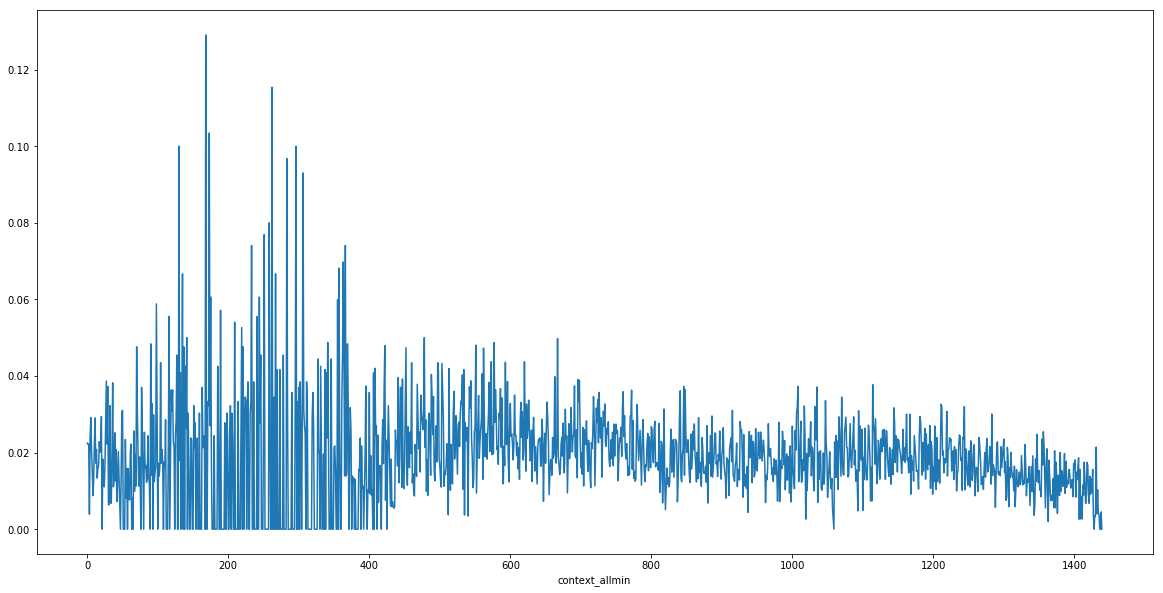

In [23]:
df.groupby(['context_allmin'])['is_trade'].mean().plot(figsize=(20,10))

这里可以看到，凌晨的点击率数据波动非常剧烈，原因一可能是用户的喜好不同，原因二可能是凌晨的数据量不足

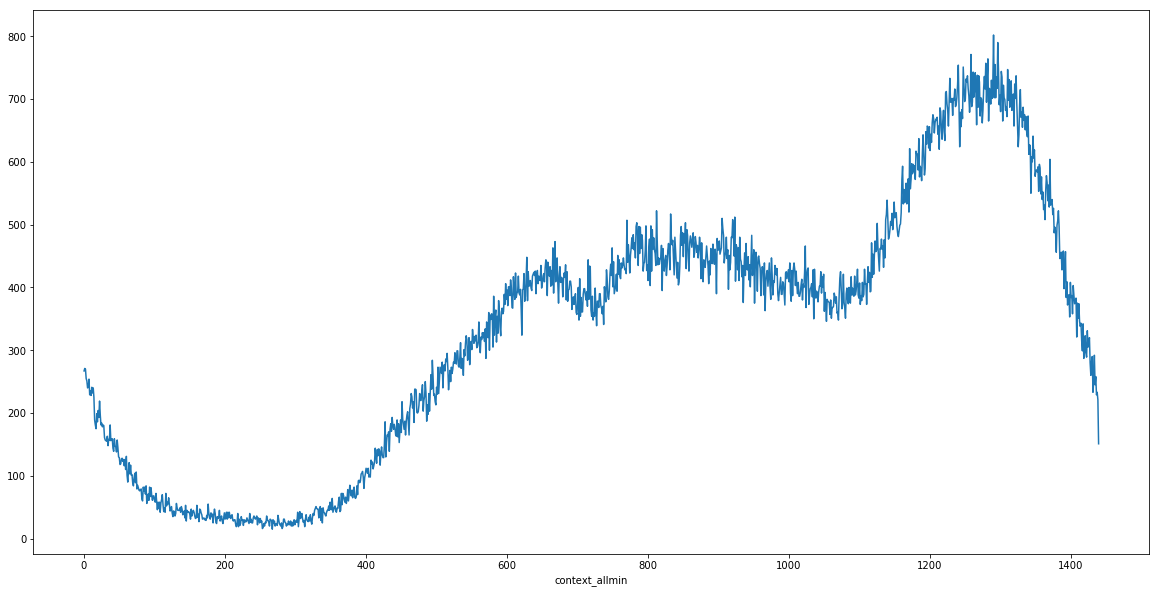

In [24]:
df.groupby(['context_allmin']).apply(lambda df1: df1.shape[0]).plot(figsize=(20,10))

上图可以证明，凌晨的数据量远小于白天，所以说，这些数据中难预测的点击率是在凌晨发生的，要注意数据的不平衡问题。

## 特征工程

### 离散变量  
item_price_level  
item_sales_level  
item_collected_level  
user_age_level  
user_star_level  
user_occupation_id  
context_page_id  
shop_review_num_level  
shop_star_level  

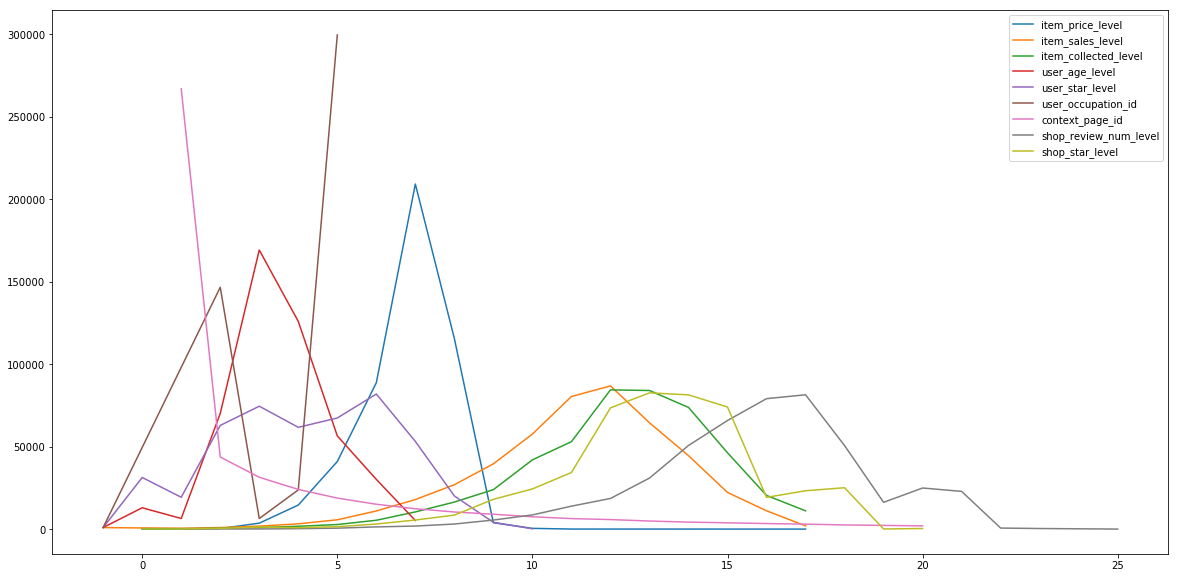

In [25]:
plt.figure(figsize=(20,10))
plt.plot(df.groupby(['item_price_level']).apply(lambda df1: df1.shape[0]), label='item_price_level' )
plt.plot(df.groupby(['item_sales_level']).apply(lambda df1: df1.shape[0]), label='item_sales_level' )
plt.plot(df.groupby(['item_collected_level']).apply(lambda df1: df1.shape[0]), label='item_collected_level' )
plt.plot(df.groupby(['user_age_level']).apply(lambda df1: df1.shape[0]), label='user_age_level' )
plt.plot(df.groupby(['user_star_level']).apply(lambda df1: df1.shape[0]), label='user_star_level' )
plt.plot(df.groupby(['user_occupation_id']).apply(lambda df1: df1.shape[0]), label='user_occupation_id' )
plt.plot(df.groupby(['context_page_id']).apply(lambda df1: df1.shape[0]), label='context_page_id' )
plt.plot(df.groupby(['shop_review_num_level']).apply(lambda df1: df1.shape[0]), label='shop_review_num_level' )
plt.plot(df.groupby(['shop_star_level']).apply(lambda df1: df1.shape[0]), label='shop_star_level' )
plt.legend(loc='upper right')
plt.show()

从案例数量曲线中看到几个相似的离散变量分布:  
一类高斯分布：item_price_level、user_age_level、user_star_level、item_sales_level、item_collected_level、shop_star_level、shop_review_num_level  
二类线性分布：context_page_id  
三类随机分布：user_occupation_id  

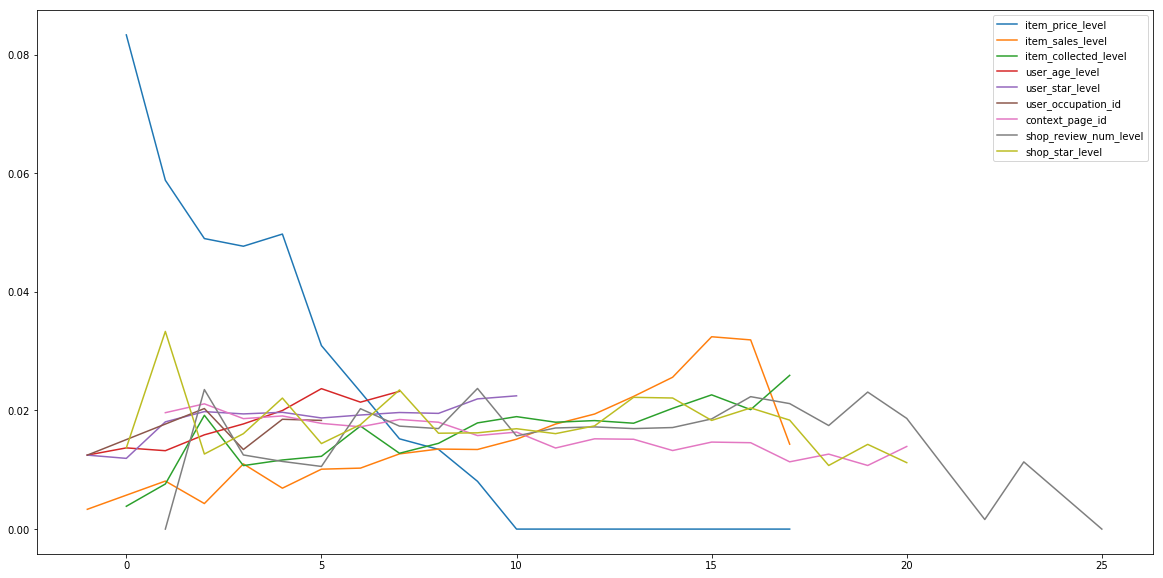

In [26]:
plt.figure(figsize=(20,10))
plt.plot(df.groupby(['item_price_level'])['is_trade'].mean(), label='item_price_level' )
plt.plot(df.groupby(['item_sales_level'])['is_trade'].mean(), label='item_sales_level' )
plt.plot(df.groupby(['item_collected_level'])['is_trade'].mean(), label='item_collected_level' )
plt.plot(df.groupby(['user_age_level'])['is_trade'].mean(), label='user_age_level' )
plt.plot(df.groupby(['user_star_level'])['is_trade'].mean(), label='user_star_level' )
plt.plot(df.groupby(['user_occupation_id'])['is_trade'].mean(), label='user_occupation_id' )
plt.plot(df.groupby(['context_page_id'])['is_trade'].mean(), label='context_page_id' )
plt.plot(df.groupby(['shop_review_num_level'])['is_trade'].mean(), label='shop_review_num_level' )
plt.plot(df.groupby(['shop_star_level'])['is_trade'].mean(), label='shop_star_level' )
plt.legend(loc='upper right')
plt.show()

从案例点击率曲线中看到几个相似的离散变量分布:  
一类递增分布：user_age_level、user_star_level、item_sales_level、item_collected_level  
二类递减分布：item_price_level、context_page_id、shop_star_level  
三类均匀分布：shop_review_num_level、user_occupation_id  

经过分析之后，user_occupation_id 特征明显不属于离散变量，没有明显分布，应该对该特征进行 one-hot 编码

In [27]:
A = pd.get_dummies(df['user_occupation_id'])
print (A.shape)
print (df.shape)
df = pd.concat([df,A],axis=1)
df = df.drop('user_occupation_id', 1)
print (df.shape)

(477334, 5)
(477334, 26)
(477334, 30)


### 连续变量
  
shop_score_delivery  	
shop_score_description  
shop_review_positive_rate  

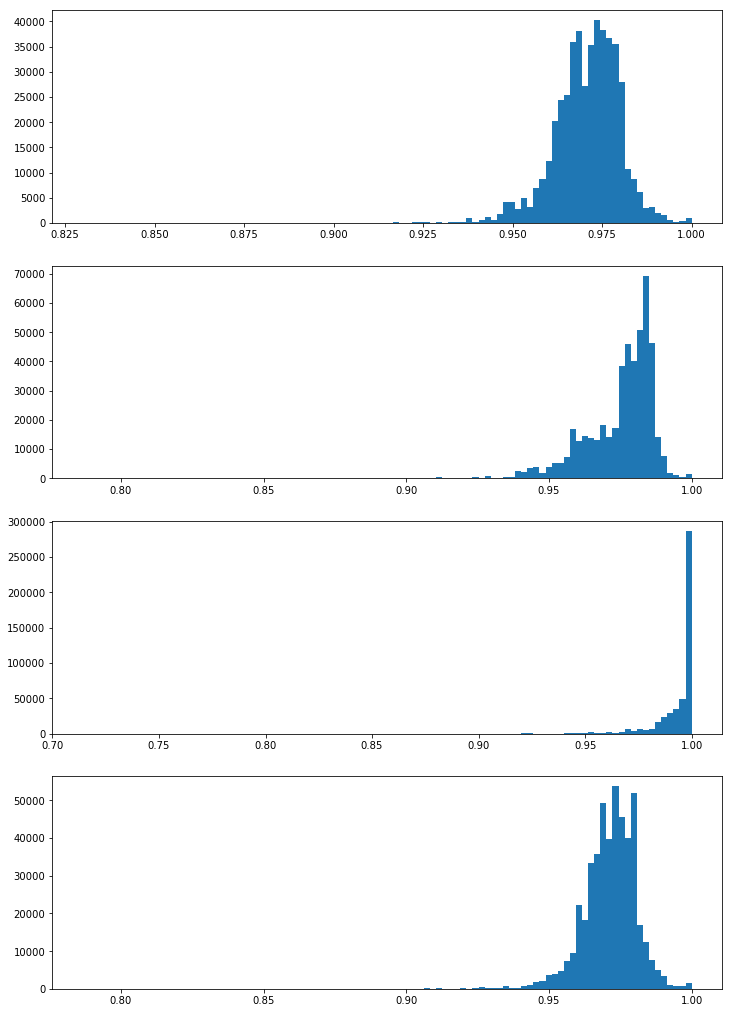

In [28]:
plt.figure(figsize=(12,18))
plt.subplot(4,1,1)
plt.hist(df['shop_score_delivery'], 100)
plt.subplot(4,1,2)
plt.hist(df['shop_score_description'], 100)
plt.subplot(4,1,3)
plt.hist(df['shop_review_positive_rate'], 100)
plt.subplot(4,1,4)
plt.hist(df['shop_score_service'], 100)
plt.show()

连续变量中有一部分偏移很高的部分，会影响模型的表现，舍去，取阈值0.9（这里这样处理不是最好方式，暂时如此）

In [29]:
df= df[df.shop_review_positive_rate>=0.9]
df= df[df.shop_score_description>=0.9]
df= df[df.shop_score_delivery>=0.9]
df= df[df.shop_score_service>=0.9]

In [30]:
df.shape

(476996, 30)

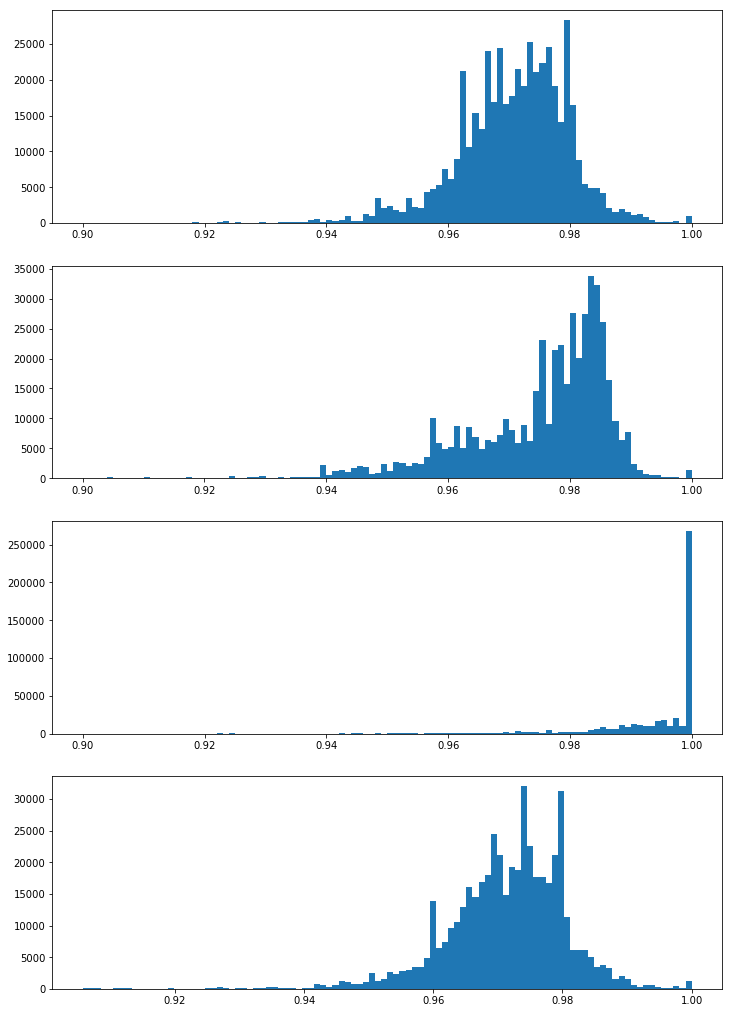

In [31]:
plt.figure(figsize=(12,18))
plt.subplot(4,1,1)
plt.hist(df['shop_score_delivery'], 100)
plt.subplot(4,1,2)
plt.hist(df['shop_score_description'], 100)
plt.subplot(4,1,3)
plt.hist(df['shop_review_positive_rate'], 100)
plt.subplot(4,1,4)
plt.hist(df['shop_score_service'], 100)
plt.show()

这里很明显店铺受到的好评率有人为修改的痕迹，所以说这一部分可能会影响到模型的效果，所以舍去这一列

In [32]:
 df = df.drop('shop_review_positive_rate', 1)

### 特殊变量（字符转化变量）
  
item_id  
item_brand_id  
item_city_id  
user_id  
user_gender_id  
context_id  
shop_id  

In [33]:
# 用户性别 -1：缺失  0：女  1：男  2：家庭
Counter(df.user_gender_id)

Counter({-1L: 12863, 0L: 360000, 1L: 93837, 2L: 10296})

In [34]:
for col in ['item_id','item_brand_id','item_city_id','user_id','context_id','shop_id']:
    l = pd.unique(df[col]).shape[0]
    print (col + ' 有 ' +str(l) + ' 个特异值')
    print ('平均每个特异值有 '+ str(df.shape[0]/l) +' 个案例')
    print ('-------------------')

item_id 有 9950 个特异值
平均每个特异值有 47 个案例
-------------------
item_brand_id 有 2030 个特异值
平均每个特异值有 234 个案例
-------------------
item_city_id 有 127 个特异值
平均每个特异值有 3755 个案例
-------------------
user_id 有 197361 个特异值
平均每个特异值有 2 个案例
-------------------
context_id 有 476969 个特异值
平均每个特异值有 1 个案例
-------------------
shop_id 有 3885 个特异值
平均每个特异值有 122 个案例
-------------------


可以看到，context_id 应该是对这个文本的编号，是没有用的，先舍去

In [35]:
df = df.drop('context_id', 1)

In [36]:
df.shape

(476996, 28)

In [37]:
df.head()

,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,user_age_level,...,shop_score_description,is_trade,context_hour,context_min,context_allmin,-1,2,3,4,5
0,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,3,...,1.0,0,10,9,609,0,0,0,0,1
1,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,2,...,1.0,0,12,0,720,0,0,0,0,1
2,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,3,...,1.0,0,3,4,184,0,0,0,0,1
3,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,4,...,1.0,0,6,17,377,0,0,0,0,1
4,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,0,2,...,1.0,0,19,48,1188,0,0,0,0,1


## 保存

In [38]:
df.to_csv('../Output/train_step3.csv', index=False)